# Filtros Convolucionais

Retomando o que já aprendemos
* **Kernels** são filtros convolucionais. Na prática são arrays n-dimensionais que são operados com o dado através da convolução.
* Os **pesos do kernel**, ou seja, os elementos do array, carregam o padrão que será procurado no dado original.

Esses filtros podem ser manualmente projetados se já sabemos o padrão que queremos procurar, ou o mapa de ativação desejado. A seguir vamos conhecer alguns kernels convolucionais e a intuição por trás do padrão que eles projetam.

In [1]:
# Importa a interface de plotagem do Matplotlib, usada para criar gráficos e imagens.
import matplotlib.pyplot as plt

# Importa do scikit-image a função de I/O para carregar/salvar imagens.
from skimage import io

# Traz a função de convolução da SciPy para aplicar kernels/filtros em sinais ou imagens.
from scipy.signal import convolve

# Importa o NumPy para operações numéricas e manipulação de arrays.
import numpy as np

# (Jupyter) Garante que as figuras do Matplotlib sejam renderizadas dentro da célula do notebook.
%matplotlib inline


Na célula a seguir temos novamente a função utilizada na impressão dos resultados.

In [2]:
# Define a função 'show' que exibe lado a lado: a imagem original, o kernel e o mapa de ativação, com anotações no kernel.
def show(img, kernel, resultado, titulo):

  # Cria uma figura com 1 linha e 3 colunas de subplots, tamanho total 15×5.
  fig, axs = plt.subplots(1, 3, figsize=(15, 5))

  # Agrupa os dados a serem plotados na ordem: imagem, kernel e resultado (mapa de ativação).
  plot = [img, kernel, resultado]

  # Define os títulos de cada painel, usando 'titulo' para nomear o kernel mostrado.
  titulos = ['Imagem', titulo, 'Mapa de Ativação']

  # Para cada eixo (subplot), desenha o respectivo conteúdo em escala de cinza e limpa ticks/define título.
  for k, ax in enumerate(axs):
    ax.imshow(plot[k], cmap='gray')
    ax.set_yticks([])
    ax.set_xticks([])
    ax.set_title(titulos[k])

  # Sobrepõe os valores numéricos de cada célula do kernel no painel central (axs[1]).
  for i, line in enumerate(kernel):
    for j, col in enumerate(line):
      axs[1].text(j, i, '{:.2f}'.format(col), fontsize=12, color='red', ha='center', va='center')


Como dado de entrada usaremos a imagem de um dos instrutores da Alura, o Guilherme Silveira.

In [3]:
# !wget https://s3.us-east-1.amazonaws.com/jarvis-caelum/GUI.jpg

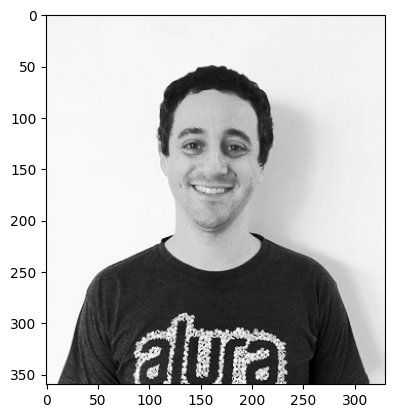

In [4]:
# Lê a imagem 'GUI.jpg' do disco como um array NumPy (formato típico H×W×C).
img = io.imread('GUI.jpg')

# Seleciona apenas o primeiro canal da imagem (conversão simples para 1 canal).
img = img[:,:,0]

# Exibe a imagem em escala de cinza usando o Matplotlib.
plt.imshow(img, cmap='gray')
plt.show()

## Filtro da Média

Ao aplicar este filtro a uma imagem, o mapa de ativação resultante será uma versão suavizada da imagem original (mais "borrada", menos nítida). Este efeito é alcançado explorando a operação de convolução para **tirar a média dos pixels** de subregiões da imagem.

Os pesos desse kernel são definidos para replicar a operação da média, ou seja, para um filtro $3 \times 3$ com 9 pesos, temos que: <br><br>
\begin{equation}
\frac{\sum_{x=1}^{9} p(x)}{9} = \sum_{x=1}^{9} \frac{1}{9} p(x)
\end{equation}

Vamos modelar dois filtros:
* $3 \times 3$, com todos os pesos iguais a $\frac{1}{3^2}$ 

* $9 \times 9$, com todos os pesos iguais a $\frac{1}{9^2}$

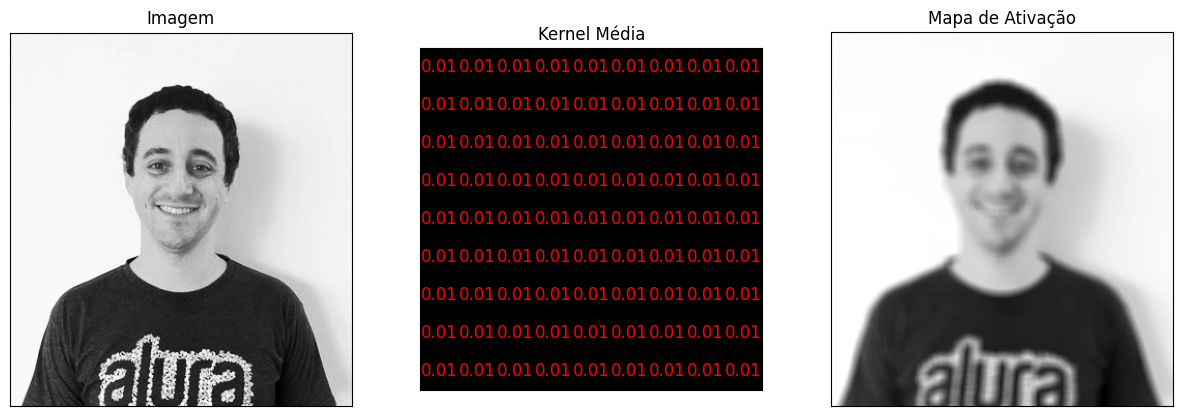

In [5]:
# Seção: filtro de média (mean filter) para suavização da imagem.
##### MEAN

# Referência teórica do filtro de média (explicação e exemplos).
# reference https://homepages.inf.ed.ac.uk/rbf/HIPR2/mean.htm

# Cria um kernel 9×9 inicializado com zeros (matriz para filtragem espacial).
kernel_media = np.zeros((9,9))

# Preenche todo o kernel com 1/(9²)=1/81, tornando-o um kernel de média uniforme.
kernel_media[:] = 1.0/(9**2)

# Convoluciona a imagem com o kernel de média; mode='valid' evita padding (reduz bordas).
resultado = convolve(img, kernel_media, mode='valid')

# Mostra a imagem original, o kernel anotado e o mapa de ativação (imagem suavizada).
show(img, kernel_media, resultado, 'Kernel Média')


## Sobel 

Esse se parece muito com o filtro de bordas que já fizemos na aula passada, com a diferença que os vizinhos diretos do pixel central tem valor absoluto de maior intensidade (na horizontal ou na vertical, a depender da borda desejada).

> Após realizar a convolução, podemos imprimir os **valores absolutos** do mapa de ativação para visualizar as bordas independente do sinal da ativação.


[[-1. -2. -1.]
 [ 0.  0.  0.]
 [ 1.  2.  1.]]


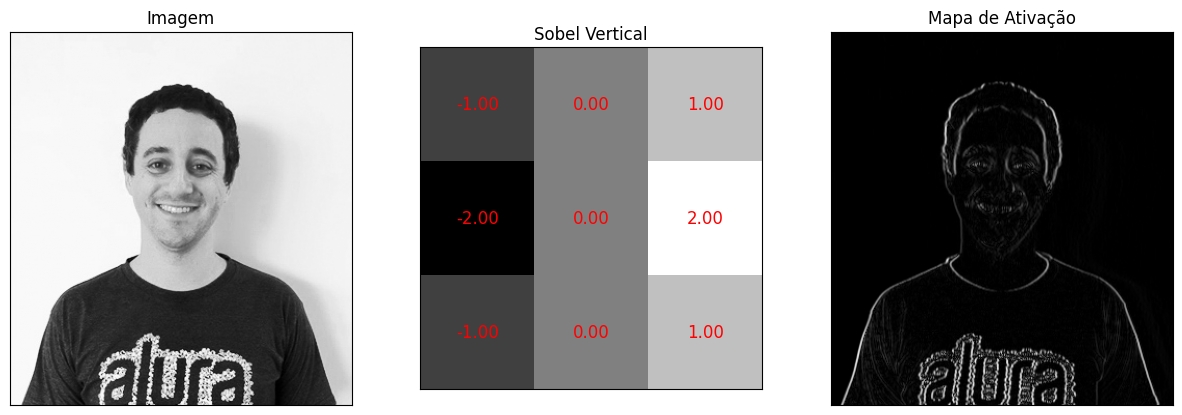

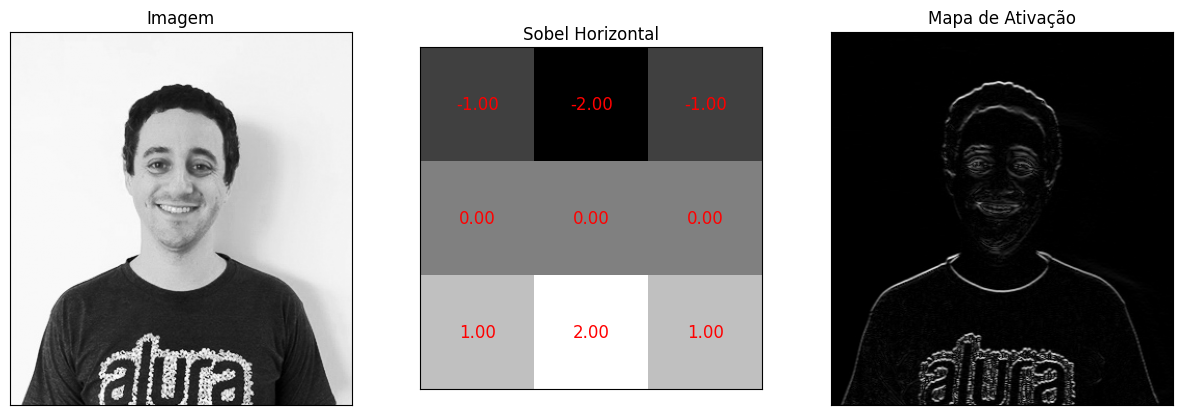

In [6]:
# Referência sobre o filtro de Sobel (descrição e exemplos).
# reference: https://pt.wikipedia.org/wiki/Filtro_Sobel

# Seção: kernel de Sobel para detectar bordas VERTICAIS (variação no eixo X).
##### SOBEL VERTICAL
# Cria matriz 3×3 inicializada com zeros para montar o kernel vertical.
sobel_v = np.zeros((3,3))
# Define a coluna da esquerda como -1 (sensibiliza transições negativas).
sobel_v[:, 0] = -1
# Define a coluna da direita como +1 (sensibiliza transições positivas).
sobel_v[:, 2] = 1
# Reforça a linha central nos extremos (pesos -2 e +2), formando [[-1,0,1],[-2,0,2],[-1,0,1]].
sobel_v[1, [0, 2]] = [-2, 2]
# (Opcional) Inspeciona o kernel no console.
# print(sobel_v)

# Aplica a convolução 2D sem padding (mode='valid') usando o kernel vertical.
resultado = convolve(img, sobel_v, mode='valid')
# Mostra a imagem, o kernel e a magnitude da resposta (|resultado|) para realçar bordas.
show(img, sobel_v, np.abs(resultado), 'Sobel Vertical')


# Seção: kernel de Sobel para detectar bordas HORIZONTAIS (variação no eixo Y).
##### SOBEL HORIZONTAL
# Cria matriz 3×3 para o kernel horizontal.
sobel_h = np.zeros((3,3))
# Define a linha superior como -1 -2 -1 (parte negativa).
sobel_h[0, :] = -1
# Define a linha inferior como +1 +2 +1 (parte positiva).
sobel_h[2, :] = 1
# Ajusta a coluna central nas linhas de topo e base para -2 e +2 respectivamente.
sobel_h[[0, 2], 1] = [-2, 2]
# Exibe o kernel horizontal no console para conferência.
print(sobel_h)

# Convoluciona a imagem com o kernel horizontal (sem padding).
resultado = convolve(img, sobel_h, mode='valid')
# Exibe a imagem, o kernel e a magnitude da resposta para bordas horizontais.
show(img, sobel_h, np.abs(resultado), 'Sobel Horizontal')


## Laplace

Por fim, vamos ver mais um filtro utilizado para detecção de bordas, o Laplace. Diferente do Sobel, este filtro destaca igualmente bordas de diferentes direções.

[[-1. -1. -1.]
 [-1.  8. -1.]
 [-1. -1. -1.]]


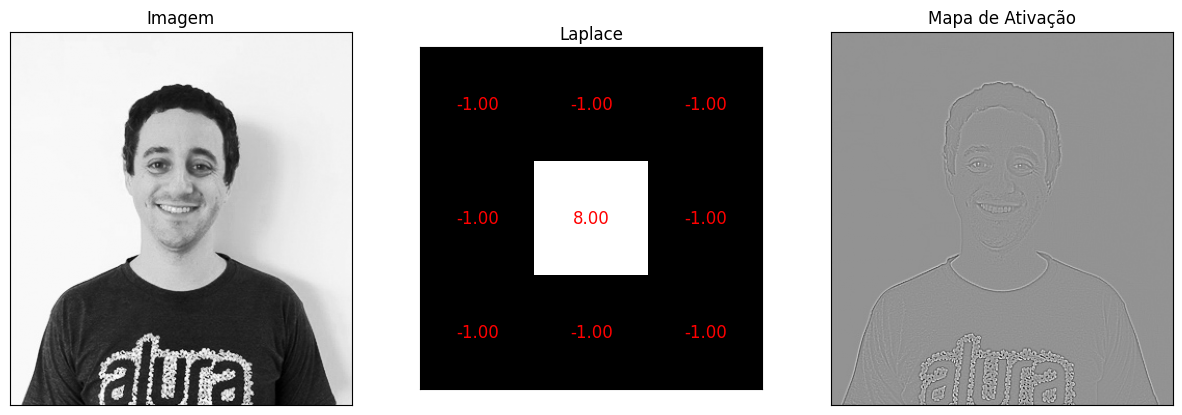

In [7]:
# Seção para o operador de Laplace (realça bordas de forma isotrópica).
##### LAPLACE

# Referências sobre o Laplaciano discreto e LoG (Laplacian of Gaussian).
#reference: https://en.wikipedia.org/wiki/Discrete_Laplace_operator | https://homepages.inf.ed.ac.uk/rbf/HIPR2/log.htm

# Cria um kernel 3×3 preenchido com -1 (base para o Laplaciano 8-conectado).
laplace = np.ones((3,3)) * -1

# Define o elemento central como 8 (soma dos coeficientes = 0), obtendo:
# [-1 -1 -1; -1 8 -1; -1 -1 -1]
laplace[1,1] = 8

# Imprime o kernel para conferência.
print(laplace)

# Convoluciona a imagem em escala de cinza com o kernel Laplaciano (sem padding).
resultado = convolve(img, laplace, mode='valid')

# Exibe imagem, kernel e mapa de ativação.
# OBS: em Python, '--resultado' é igual a 'resultado' (dupla negação). 
# Se a intenção for inverter o sinal, use '-resultado'; para magnitude, use 'np.abs(resultado)'.
show(img, laplace, resultado, 'Laplace')


# Convolução e Padrões Complexos

Para entender melhor como a convolução funciona como um casamento de padrões, vamos agora definir um filtro convolucional mais complexo, mas capaz de encontrar um casamento perfeito no dado.

Primeiro vamos baixar a imagem que será usada de exemplo:

In [8]:
# !wget https://www.dropbox.com/s/0nrix9eknyybuqk/image_2007_000032.jpg?dl=0
# !mv image_2007_000032.jpg?dl=0 plane.jpg

Vamos separar um próprio patch da imagem para usar como filtro de convolução. Para facilitar a visualização, selecionamos a região da turbina, localizada nas coordenadas ```[109, 129, 255, 275]```

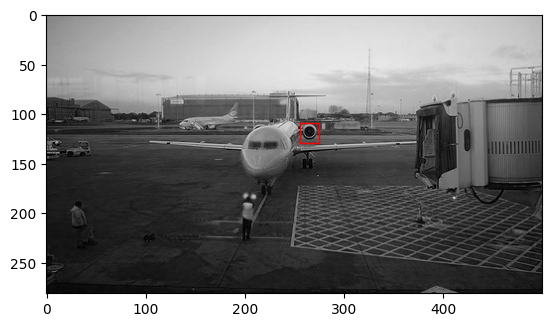

In [9]:
# Importa utilitários de formas do Matplotlib; usaremos Rectangle para desenhar a caixa.
import matplotlib.patches as patches

# Lê a imagem 'plane.jpg' do disco como array NumPy.
img = io.imread('plane.jpg')

# Seleciona apenas o primeiro canal (conversão simples para 1 canal, útil para exibir em escala de cinza).
img = img[:,:,0]

# Define o retângulo de interesse no formato [y_min, y_max, x_min, x_max].
retangulo = [109, 129, 255, 275]


# Cria figura e eixos onde a imagem e o retângulo serão desenhados.
fig, ax = plt.subplots()

# Mostra a imagem em tons de cinza no eixo.
ax.imshow(img, cmap='gray')

# Adiciona um retângulo sem preenchimento (apenas borda vermelha):
# - Origem (x, y) = (x_min, y_min) => (retangulo[2], retangulo[0])
# - Largura = x_max - x_min
# - Altura  = y_max - y_min
ax.add_patch(patches.Rectangle((retangulo[2], retangulo[0]),
                               (retangulo[3] - retangulo[2]),
                               (retangulo[1] - retangulo[0]), color='red', fill=False))
plt.show()

Para que o patch possa ser utilizado como filtro de convolução, precisamos:
* Subtrair o patch pelo valor do pixel médio (centralizando a distribuição)
* Inverter o filtro com a função ```flip``` do numpy. 

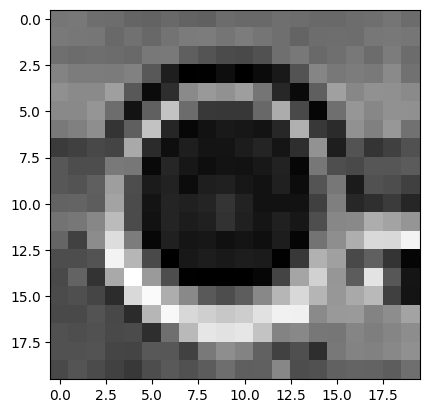

In [10]:
# Recorta um patch (subimagem) da área definida por [y_min:y_max, x_min:x_max].
patch = img[retangulo[0]:retangulo[1], retangulo[2]:retangulo[3]]

# Centraliza os valores do patch removendo a média (normalização por centragem).
patch = patch - patch.mean()

# Inverte o patch em ambas as dimensões (flip 2D; equivale a uma rotação de 180° para correção da convolução clássica).
patch = np.flip(patch)

# Exibe o patch resultante em escala de cinza.
plt.imshow(patch, cmap='gray')
plt.show()

Vamos ver agora o resultado da convolução.

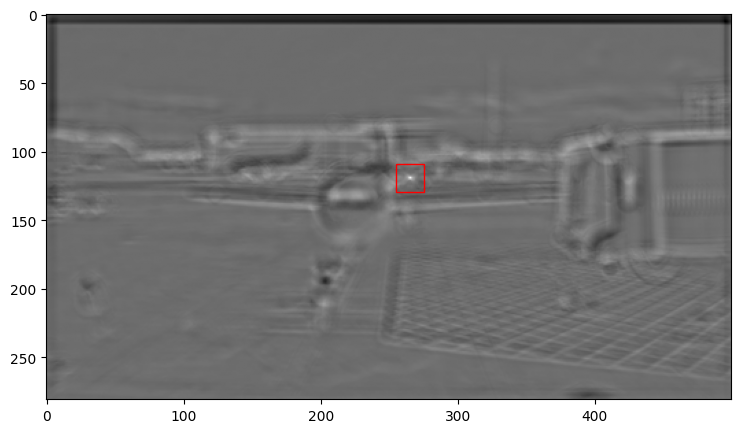

In [11]:
# Convoluciona a imagem com o patch (template); mode='same' mantém o mesmo tamanho da imagem (alternativas: 'valid'/'full').
resultado = convolve(img, patch, mode='same')  # ou 'valid'/'full'

# Cria figura e eixos para visualizar o mapa de respostas da correlação/convolução.
fig, ax = plt.subplots(figsize=(15, 5))

# Exibe o mapa de ativação (valores altos ≈ maior semelhança com o patch).
ax.imshow(resultado, cmap='gray')

# Desenha o retângulo na posição original de referência (x_min,y_min, largura, altura), sem preenchimento (apenas borda vermelha).
ax.add_patch(patches.Rectangle((retangulo[2], retangulo[0]),
                               (retangulo[3] - retangulo[2]),
                               (retangulo[1] - retangulo[0]), color='red', fill=False))
plt.show()